In [1]:
import numpy as np
import scipy.signal as signal

def autocorrelation_method(signal, order):
    """
    Estimate LPC coefficients using autocorrelation method.
    
    Args:
    - signal: input speech signal (1D numpy array)
    - order: LPC order (integer)
    
    Returns:
    - lpc_coeffs: LPC coefficients (1D numpy array)
    """
    # Compute autocorrelation coefficients
    R = np.correlate(signal, signal, mode='full')
    
    # Keep only positive lags
    R = R[len(R)//2:]
    
    # Create toeplitz matrix
    R_toeplitz = np.array([R[i:i+order] for i in range(order)])
    
    # Compute autocorrelation vector
    r = R[1:order+1]
    
    # Solve the normal equations to obtain LPC coefficients
    lpc_coeffs = np.linalg.solve(R_toeplitz, -r)
    
    return np.concatenate([[1], lpc_coeffs])

def lpcc(signal, order_lpcc, order_lpc):
    """
    Calculate LPCC coefficients from LPC coefficients.
    
    Args:
    - signal: input speech signal (1D numpy array)
    - order_lpcc: LPCC order (integer)
    - order_lpc: LPC order (integer)
    
    Returns:
    - lpcc_coeffs: LPCC coefficients (1D numpy array)
    """
    # Calculate LPC coefficients
    lpc_coeffs = autocorrelation_method(signal, order_lpc)
    
    # Ensure LPCC order does not exceed LPC order
    order_lpcc = min(order_lpcc, order_lpc)
    
    # Perform cepstral analysis to obtain LPCC coefficients
    lpcc_coeffs = lpc_coeffs.copy()
    for m in range(order_lpcc):  # Corrected loop range
        sum_term = np.sum([k * lpcc_coeffs[k] * lpcc_coeffs[k-m] for k in range(m+1)])  # Adjusted index
        lpcc_coeffs[m] += sum_term / (m + 1)  # Adjusted index
    return lpcc_coeffs

# Example usage:
# Assuming you have a speech signal stored in the variable 'signal' and you want to compute LPCC coefficients
order_lpcc = 12  # LPCC order
order_lpc = 10   # LPC order

# Generate a synthetic speech signal (example)
fs = 8000  # Sampling frequency
duration = 1  # Duration of the signal (seconds)
t = np.linspace(0, duration, fs * duration, endpoint=False)
f0 = 100  # Fundamental frequency (Hz)
signal = np.sin(2 * np.pi * f0 * t)

lpcc_coeffs = lpcc(signal, order_lpcc, order_lpc)
print("LPCC coefficients:", lpcc_coeffs)


LPCC coefficients: [ 1.00000000e+00 -2.33865614e-03 -1.66354695e+00  3.60261124e-03
  4.39444691e-04 -7.16203489e-03 -3.37435217e-03  1.28293769e-02
 -1.56611302e-02  1.87296881e-02 -3.71049494e-03]


LPCC coefficients: [ 1.00000000e+00 -2.33865614e-03 -1.66354695e+00  3.60261124e-03
  4.39444691e-04 -7.16203489e-03 -3.37435217e-03  1.28293769e-02
 -1.56611302e-02  1.87296881e-02 -3.71049494e-03]


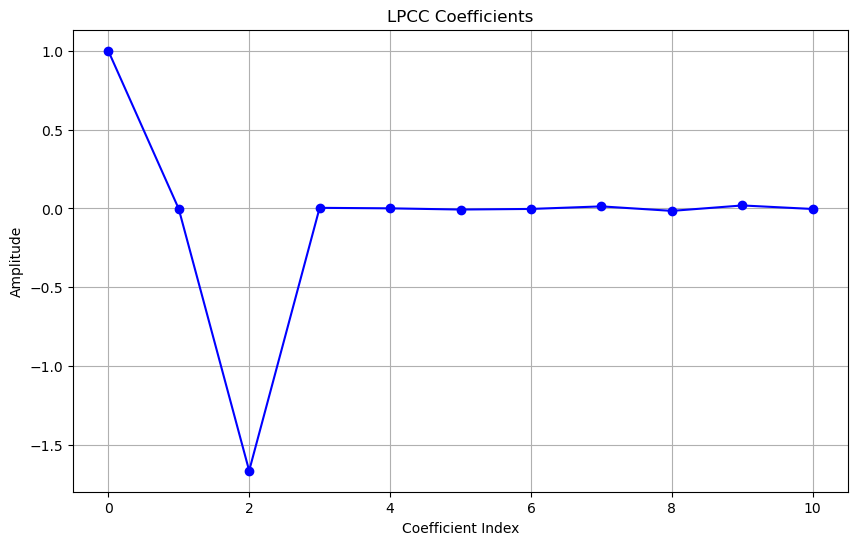

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def autocorrelation_method(signal, order):
    """
    Estimate LPC coefficients using autocorrelation method.
    
    Args:
    - signal: input speech signal (1D numpy array)
    - order: LPC order (integer)
    
    Returns:
    - lpc_coeffs: LPC coefficients (1D numpy array)
    """
    # Compute autocorrelation coefficients
    R = np.correlate(signal, signal, mode='full')
    
    # Keep only positive lags
    R = R[len(R)//2:]
    
    # Create toeplitz matrix
    R_toeplitz = np.array([R[i:i+order] for i in range(order)])
    
    # Compute autocorrelation vector
    r = R[1:order+1]
    
    # Solve the normal equations to obtain LPC coefficients
    lpc_coeffs = np.linalg.solve(R_toeplitz, -r)
    
    return np.concatenate([[1], lpc_coeffs])

def lpcc(signal, order_lpcc, order_lpc):
    """
    Calculate LPCC coefficients from LPC coefficients.
    
    Args:
    - signal: input speech signal (1D numpy array)
    - order_lpcc: LPCC order (integer)
    - order_lpc: LPC order (integer)
    
    Returns:
    - lpcc_coeffs: LPCC coefficients (1D numpy array)
    """
    # Calculate LPC coefficients
    lpc_coeffs = autocorrelation_method(signal, order_lpc)
    
    # Ensure LPCC order does not exceed LPC order
    order_lpcc = min(order_lpcc, order_lpc)
    
    # Perform cepstral analysis to obtain LPCC coefficients
    lpcc_coeffs = lpc_coeffs.copy()
    for m in range(order_lpcc):  # Corrected loop range
        sum_term = np.sum([k * lpcc_coeffs[k] * lpcc_coeffs[k-m] for k in range(m+1)])  # Adjusted index
        lpcc_coeffs[m] += sum_term / (m + 1)  # Adjusted index
    return lpcc_coeffs

def generate_synthetic_signal(duration, fs, f0):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * f0 * t)
    return signal

def plot_lpcc(lpcc_coeffs):
    plt.figure(figsize=(10, 6))
    plt.plot(lpcc_coeffs, marker='o', linestyle='-', color='b')
    plt.title('LPCC Coefficients')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Example usage:
order_lpcc = 12  # LPCC order
order_lpc = 10   # LPC order
fs = 8000        # Sampling frequency
duration = 1     # Duration of the signal (seconds)
f0 = 100         # Fundamental frequency (Hz)

# Generate synthetic speech signal
signal = generate_synthetic_signal(duration, fs, f0)

# Compute LPCC coefficients
lpcc_coeffs = lpcc(signal, order_lpcc, order_lpc)
print("LPCC coefficients:", lpcc_coeffs)

# Plot LPCC coefficients
plot_lpcc(lpcc_coeffs)


In [3]:
# Function to save LPCC coefficients to a file
def save_lpcc_coeffs(lpcc_coeffs, filename):
    np.savetxt(filename, lpcc_coeffs)

# Function to load LPCC coefficients from a file
def load_lpcc_coeffs(filename):
    return np.loadtxt(filename)

# Example usage:
# Assuming you have computed LPCC coefficients and want to save/load them to/from a file

# Save LPCC coefficients to a file
save_lpcc_coeffs(lpcc_coeffs, 'lpcc_coeffs.txt')
print("LPCC coefficients saved to 'lpcc_coeffs.txt'")

# Load LPCC coefficients from a file
loaded_lpcc_coeffs = load_lpcc_coeffs('lpcc_coeffs.txt')
print("Loaded LPCC coefficients:", loaded_lpcc_coeffs)


LPCC coefficients saved to 'lpcc_coeffs.txt'
Loaded LPCC coefficients: [ 1.00000000e+00 -2.33865614e-03 -1.66354695e+00  3.60261124e-03
  4.39444691e-04 -7.16203489e-03 -3.37435217e-03  1.28293769e-02
 -1.56611302e-02  1.87296881e-02 -3.71049494e-03]


In [4]:
import numpy as np
import scipy.signal as signal

def synthesise_from_lpcc(lpcc_coeffs, duration, fs):
    # Convert LPCC coefficients to LPC coefficients
    order_lpc = len(lpcc_coeffs) - 1
    lpc_coeffs = np.zeros(order_lpc + 1)
    lpc_coeffs[1:] = lpcc_coeffs[1:]

    # Generate white noise
    noise = np.random.normal(0, 1, int(fs * duration))

    # Filter the noise through LPC system
    synthesized_signal = signal.lfilter([1], lpc_coeffs, noise)

    return synthesized_signal

# Example usage:
# Assuming you have LPCC coefficients stored in the variable 'lpcc_coeffs' and want to synthesize speech
duration = 1  # Duration of the synthesized signal (seconds)
fs = 8000     # Sampling frequency

# Synthesize speech from LPCC coefficients
synthesized_signal = synthesise_from_lpcc(lpcc_coeffs, duration, fs)

# Plot the synthesized signal
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(synthesized_signal)
plt.title('Synthesized Speech Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


ValueError: BUG: filter coefficient a[0] == 0 not supported yet